# Homework 6 - Seth Nielsen - ME 537

**1) Spong, Robot Modeling and Control Problems** 

**(a) Find the moments of inertia and cross products of inertia of a uniform rectangular solid with sides a, b, and c with respect to a coordinate frame with the origin at one corner and the axes along the edges of the solid.**


In [ ]:
syms m a b c real
r = [a/2 b/2 c/2];

Ixx = (m/12) * (b^2 + c^2);
Iyy = (m/12) * (a^2 + c^2);
Izz = (m/12) * (a^2 + b^2);

Icom = [Ixx 0 0; 0 Iyy 0; 0 0 Izz];

I0 = Icom - m*skew(r)^2;

simplify(I0)

-------------

ans =
 
[ (m*(b^2 + c^2))/3,        -(a*b*m)/4,        -(a*c*m)/4]
[        -(a*b*m)/4, (m*(a^2 + c^2))/3,        -(b*c*m)/4]
[        -(a*c*m)/4,        -(b*c*m)/4, (m*(a^2 + b^2))/3]

The moments of inertia are along the diagonal of $I_0$, and the products of inertia are the values on the off-diagonal.

**(b)  Show that the inertia matrix $M(q)$ for an n-link robot is always positive definite. (Look at the definition of a positive definite matrix on wikipedia if needed. The form of Kinetic energy for a n-link robot may help you here.)**

Kinetic energy $K \geq 0$ by definition. Since $K = \frac{1}{2} \dot{q}^\textsf{T} M(q) \dot{q}$, it is clear that the quantity $\dot{q}^{\textsf{T}} M(q) \dot{q}$ must also be positive (or zero in the case of $\dot{q} = 0$). A matrix $M$ is defined to be positive definite if the scalar $z^\textsf{T} Mz$ is strictly positive for every non-zero column vector $z$ of real numbers. This means the inertia matrix $M(q)$ is always positive definite.

**(c) Consider a 3-link Cartesian manipulator (see picture with prismatic joint in the z, then y, then x direction of the global frame). Assume the links are rectangular instead of cylindrical and do the following:**

**i. Compute the inertia tensor $I_i$ for each link $i = 1, 2, 3$ assuming that the links are uniform rectangular solids of length 1, width 1/4, height 1/4, and mass of 1.**


In [ ]:
l = 1;
w = 0.25;
m = 1;

I1 = [(m/12) * (l^2 + w^2) 0 0; ...
      0 (m/12) * (l^2 + w^2) 0; ...
      0 0 (m/12) * (2*w^2)]

I2 = [(m/12) * (l^2 + w^2) 0 0; ...
      0 (m/12) * (2*w^2) 0;     ...
      0 0 (m/12) * (l^2 + w^2)]

I3 = [(m/12) * (2*w^2) 0 0;     ...
      0 (m/12) * (l^2 + w^2) 0; ...
      0 0 (m/12) * (l^2 + w^2)]

-----------

I1 =

    0.0885         0         0
         0    0.0885         0
         0         0    0.0104


I2 =

    0.0885         0         0
         0    0.0885         0
         0         0    0.0104


I3 =

    0.0885         0         0
         0    0.0885         0
         0         0    0.0104

**ii. Compute the 3x3 inertia matrix $M(q)$ for this manipulator.**

In [ ]:
Jv1 = [0 0 0;
       0 0 0;
       1 0 0];
Jv2 = [0 0 0;
       0 1 0;
       1 0 0];
Jv3 = [0 0 1;
       0 1 0;
       1 0 0];

M = m*(Jv1'*Jv1 + Jv2'*Jv2 + Jv3'*Jv3)
       
-----------

       
M =

     3     0     0
     0     2     0
     0     0     1

**iii.  Show that the Christoffel symbols $c_{ijk}$ are all zero for this robot. Interpret the meaning of this for the dynamic equations of motion.**

The Christoffel symbols are all zero because none of the terms of the mass matrix $M(q)$ are a function of $q$, since each joint is prismatic and thus the arm does not rotate.

**iv.  Derive the equations of motion in matrix form.**

To find $G(q)$, the potential energy can be calculated as:

In [ ]:
syms q1 q2 real

rc1 = [0; 0; l/2];
rc2 = [0; l/2; l+q1];
rc3 = [l/2; l+q2; l+q1];
g = [0 0 9.81];

P = m*g*(rc1 + rc2 + rc3)

-----------

P =
 
(2943*q1)/100 + 981/40

Thus, $g_{2} = g_{3} = 0$, and

\begin{align}
g_1 &= \frac{\partial P}{\partial q_1} = 29.43
\end{align}

Setting $C(q,\dot{q})\dot{q} = 0$ and combining terms:

\begin{align}
f &= M(q)\ddot{q} + G(q) \\ \\
f &= \begin{bmatrix}
3 & 0 & 0 \\
0 & 2 & 0 \\
0 & 0 & 1 \end{bmatrix} + \begin{bmatrix}29.43\\0\\0\end{bmatrix}\\ \\
f &= \begin{bmatrix}
32.43 & 29.43 & 29.43 \\
29.43 & 31.43 & 29.43 \\
29.43 & 29.43 & 30.43 \end{bmatrix}
\end{align}

**(d) Use symbolic software (like the “syms” command in MATLAB) to derive the symbolic Euler-Lagrange equations of motion for a planar three-link RRR robot with each link length being 0.4m. The center of mass for each link is at a distance of 0.2m from the end. Please assume that the robot is contained in the x-y plane with x being the horizontal direction and gravity being lined up with the y axis. It is recommended that you use the robotics toolbox, but you may not use the dynamic functions in the toolbox. Please leave the equations in symbolic form with the following variables:
$m_1, m_2, m_3, I_{xx}, I_{yy}, I_{zz}, q_1, q_2, q_3, q̇_1 , q̇_2, q̇_3, g$**


In [ ]:
syms m1 m2 m3 Ixx Iyy Izz q1 q2 q3 qd1 qd2 qd3 qdd1 qdd2 qdd3 g real

m = [m1; m2; m3];
q = [q1; q2; q3];
qd = [qd1; qd2; qd3];
qdd = [qdd1; qdd2; qdd3];
gv = [0;  g;  0];
l = 0.4;
c = 0.2;
q0 = [0 0 0];

robot3 = SerialLink([0 0 l 0; 0 0 l 0; 0 0 l 0],'gravity',[0 -9.81 0]);
for i=1:3
    robot3.links(i).I = [Ixx Iyy Izz];
end

z_00 = [0; 0; 1];
z_01 = [0; 0; 1];
z_02 = [0; 0; 1];

O_00 = [0; 0; 0];
O_01 = l*[cos(q1); sin(q1); 0];
O_02 = l*[cos(q1)+cos(q1+q2); sin(q1)+sin(q1+q2); 0];

O_0c1 = c*[cos(q1); sin(q1); 0];
O_0c2 = [l*cos(q1)+c*cos(q1+q2); l*sin(q1)+c*sin(q1+q2); 0];
O_0c3 = [l*(cos(q1)+cos(q1+q2))+c*cos(q1+q2+q3); l*(sin(q1)+sin(q1+q2))+c*sin(q1+q2+q3); 0];

Jv = sym(zeros(3,3,3));
Jw = sym(zeros(3,3,3));
R = sym(zeros(3,3,3));

Jv(:,:,1) = [cross(z_00, O_0c1 - O_00) [0; 0; 0] [0; 0; 0]];
Jw(:,:,1) = [z_00                      [0; 0; 0] [0; 0; 0]];

Jv(:,:,2) = [cross(z_00, O_0c2 - O_00) cross(z_01, O_0c2 - O_01) [0; 0; 0]];
Jw(:,:,2) = [z_00                      z_01                      [0; 0; 0]];

Jv(:,:,3) = [cross(z_00, O_0c3 - O_00) cross(z_01, O_0c3 - O_01) cross(z_02, O_0c3 - O_02)];
Jw(:,:,3) = [z_00                      z_01                      z_02];

R(:,:,1) = rotz(q1);
R(:,:,2) = rotz(q1)*rotz(q2);
R(:,:,3) = rotz(q1)*rotz(q2)*rotz(q3);

% Mass matrix
M = sym(zeros(3,3));
for i=1:3
    M = M + m(i)*Jv(:,:,i)'*Jv(:,:,i) + ...
        Jw(:,:,i)'*Jw(:,:,i)*R(:,:,i)*robot3.links(i).I*R(:,:,i)'*Jw(:,:,i);
end

% Coriolis matrix
C = sym(zeros(3,3));
for k=1:3
    for j=1:3
        for i=1:3
            C(k,j) = C(k,j) + 0.5*(diff(M(k,j),q(i)) + diff(M(k,i),q(j)) - diff(M(i,j),q(k)))*qd(i);
        end
    end
end

% Gravity vector
P = m(1)*gv'*O_0c1;
P = P + m(2)*gv'*O_0c2;
P = P + m(3)*gv'*O_0c3;

G = [diff(P,q1); diff(P,q2); diff(P,q3)];

tau = simplify(M*qdd + C*qd + G)

------------

tau =
 
 Izz*qdd1 + Izz*qdd2 + Izz*qdd3 + (m1*qdd1)/25 + (m2*qdd1)/5 + (m2*qdd2)/25 + (9*m3*qdd1)/25 + (m3*qdd2)/5 + (m3*qdd3)/25 + (g*m1*cos(q1))/5 + (2*g*m2*cos(q1))/5 + (2*g*m3*cos(q1))/5 + (4*m2*qdd1*cos(q2))/25 + (2*m2*qdd2*cos(q2))/25 + (8*m3*qdd1*cos(q2))/25 + (4*m3*qdd1*cos(q3))/25 + (4*m3*qdd2*cos(q2))/25 + (4*m3*qdd2*cos(q3))/25 + (2*m3*qdd3*cos(q3))/25 + (g*m3*cos(q1 + q2 + q3))/5 - (2*m3*qd2^2*sin(q2 + q3))/25 - (2*m3*qd3^2*sin(q2 + q3))/25 - (2*m2*qd2^2*sin(q2))/25 - (4*m3*qd2^2*sin(q2))/25 - (2*m3*qd3^2*sin(q3))/25 + (g*m2*cos(q1 + q2))/5 + (2*g*m3*cos(q1 + q2))/5 + (4*m3*qdd1*cos(q2 + q3))/25 + (2*m3*qdd2*cos(q2 + q3))/25 + (2*m3*qdd3*cos(q2 + q3))/25 - (4*m3*qd1*qd2*sin(q2 + q3))/25 - (4*m3*qd1*qd3*sin(q2 + q3))/25 - (4*m3*qd2*qd3*sin(q2 + q3))/25 - (4*m2*qd1*qd2*sin(q2))/25 - (8*m3*qd1*qd2*sin(q2))/25 - (4*m3*qd1*qd3*sin(q3))/25 - (4*m3*qd2*qd3*sin(q3))/25
                                                                                                                                                                                                                                                                                                                                                                                       Izz*qdd1 + Izz*qdd2 + Izz*qdd3 + (m2*qdd1)/25 + (m2*qdd2)/25 + (m3*qdd1)/5 + (m3*qdd2)/5 + (m3*qdd3)/25 + (2*m2*qdd1*cos(q2))/25 + (4*m3*qdd1*cos(q2))/25 + (4*m3*qdd1*cos(q3))/25 + (4*m3*qdd2*cos(q3))/25 + (2*m3*qdd3*cos(q3))/25 + (g*m3*cos(q1 + q2 + q3))/5 + (2*m3*qd1^2*sin(q2 + q3))/25 + (2*m2*qd1^2*sin(q2))/25 + (4*m3*qd1^2*sin(q2))/25 - (2*m3*qd3^2*sin(q3))/25 + (g*m2*cos(q1 + q2))/5 + (2*g*m3*cos(q1 + q2))/5 + (2*m3*qdd1*cos(q2 + q3))/25 - (4*m3*qd1*qd3*sin(q3))/25 - (4*m3*qd2*qd3*sin(q3))/25
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Izz*qdd1 + Izz*qdd2 + Izz*qdd3 + (m3*qdd1)/25 + (m3*qdd2)/25 + (m3*qdd3)/25 + (2*m3*qdd1*cos(q3))/25 + (2*m3*qdd2*cos(q3))/25 + (g*m3*cos(q1 + q2 + q3))/5 + (2*m3*qd1^2*sin(q2 + q3))/25 + (2*m3*qd1^2*sin(q3))/25 + (2*m3*qd2^2*sin(q3))/25 + (2*m3*qdd1*cos(q2 + q3))/25 + (4*m3*qd1*qd2*sin(q3))/25
 

**2. Use the dynamic model of Baxter in the toolbox to do the following:**

**Given the file “desired accel.mat” calculate the joint torques $τ$ necessary to cause this acceleration. Turn in plots of the joint torques for each joint. You are only given variables for joint position, $q$, and time. You will have to use these to find $\dot{q}$ and $\ddot{q}$.**


In [ ]:
[left, right] = mdl_baxter('sim');

q0 = zeros(7,1);

dt = t(2);
qx = [q0'; q];
qy = [q; q0'];
qd = zeros(length(q)+1,7);
qdd = zeros(length(q)+1,7);

for i=1:7
    qd(:,i) = (qy(:,i) - qx(:,i))/dt;
end
qd = qd(1:end-1,:);
qdx = [q0'; qd];
qdy = [qd; q0'];

for i=1:7
    qdd(:,i) = (qdy(:,i) - qdx(:,i))/dt;
end
qdd = qdd(1:end-1,:);


%calculating the mass, coriolis and gravity terms
tau = zeros(length(q), 7);
for i=1:length(q)
    M = left.inertia(q(i,:));
    C = left.coriolis(q(i,:), qd(i,:));
    G = left.gravload(q(i,:));

    tau(i,:) = M * qdd(i,:)' + C * qd(i,:)' + G';
end

plot(t,tau(:,2))
xlabel('t');
ylabel('\tau');


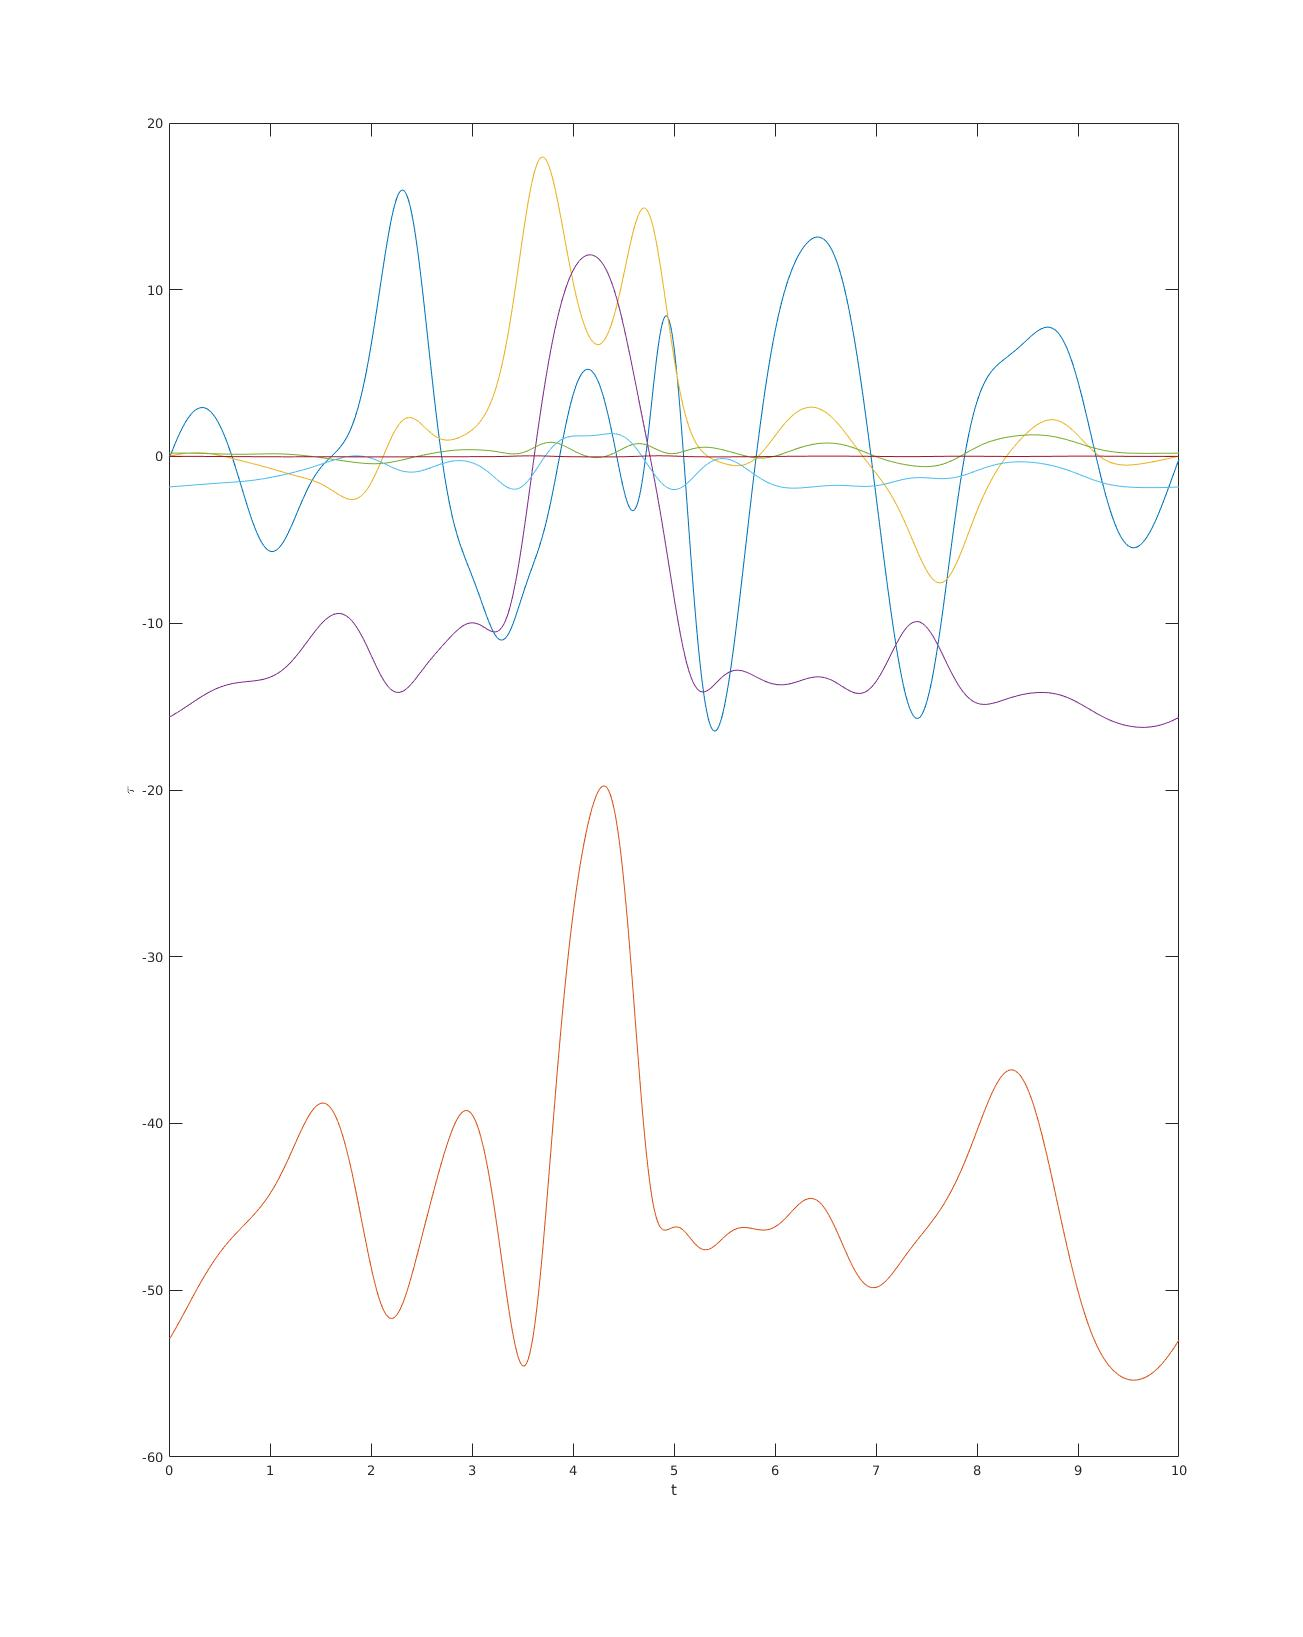

**3. Use the provided “puma560 torque profile.mat” which is for the mdl puma560 arm to calculate $\ddot{q}, \dot{q}, q$ for the entire torque profile. With regards to this, do the following:**

**(a) Use the “p560 startup script.m” and simulink model provided with this document to calculate the joint variables $\ddot{q}, \dot{q}, q$ (this should be straight forward, but I encourage you to look carefully at the simulink model and code to make sure you understand it). To access the output of the simulink simulation, you’ll need to do this “out.get(’q_sim’)” for each of the following variable names - q_sim, qd_sim, qdd_sim and t_sim. For this simulation, we are including viscous friction, but neglecting Coulomb friction. This is the purpose of line 8 in “p560 startup script.m”.**

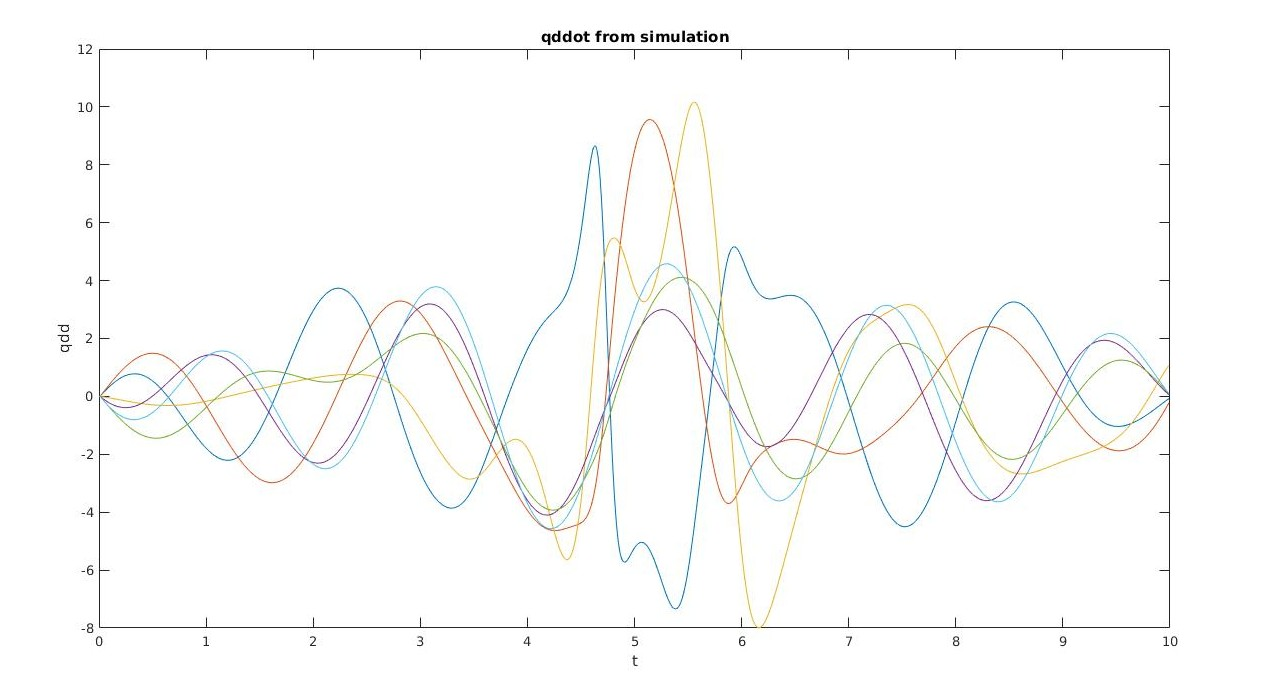
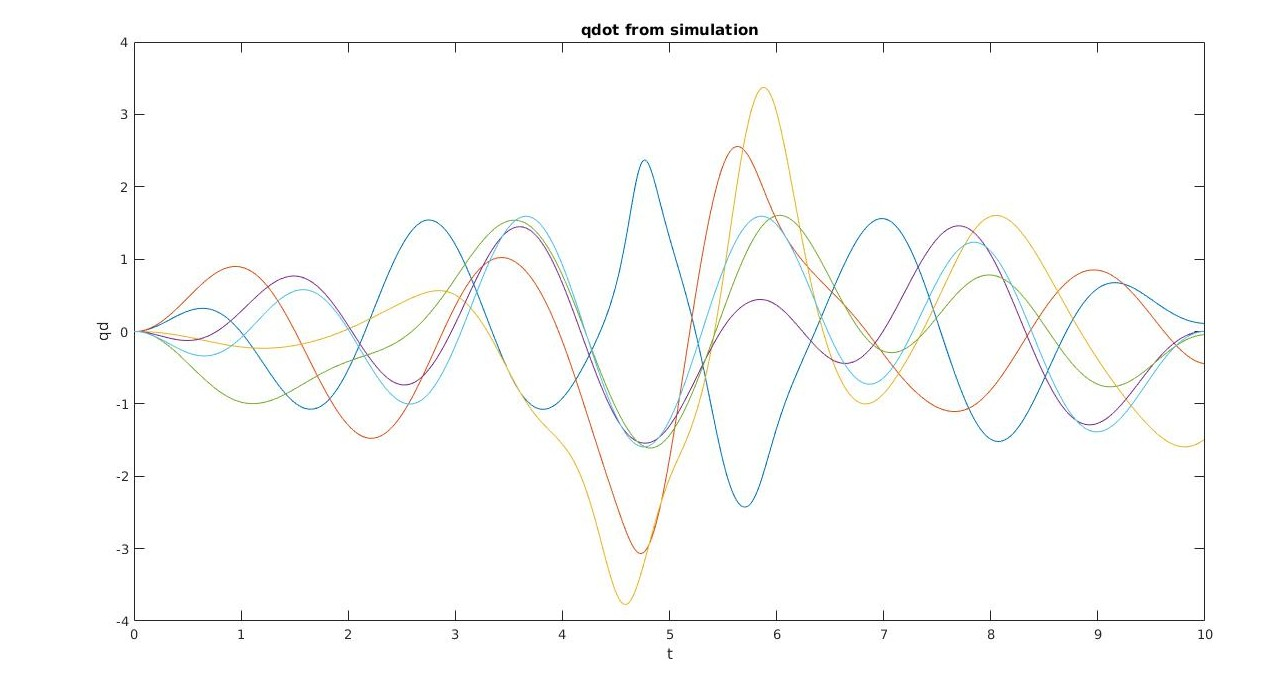
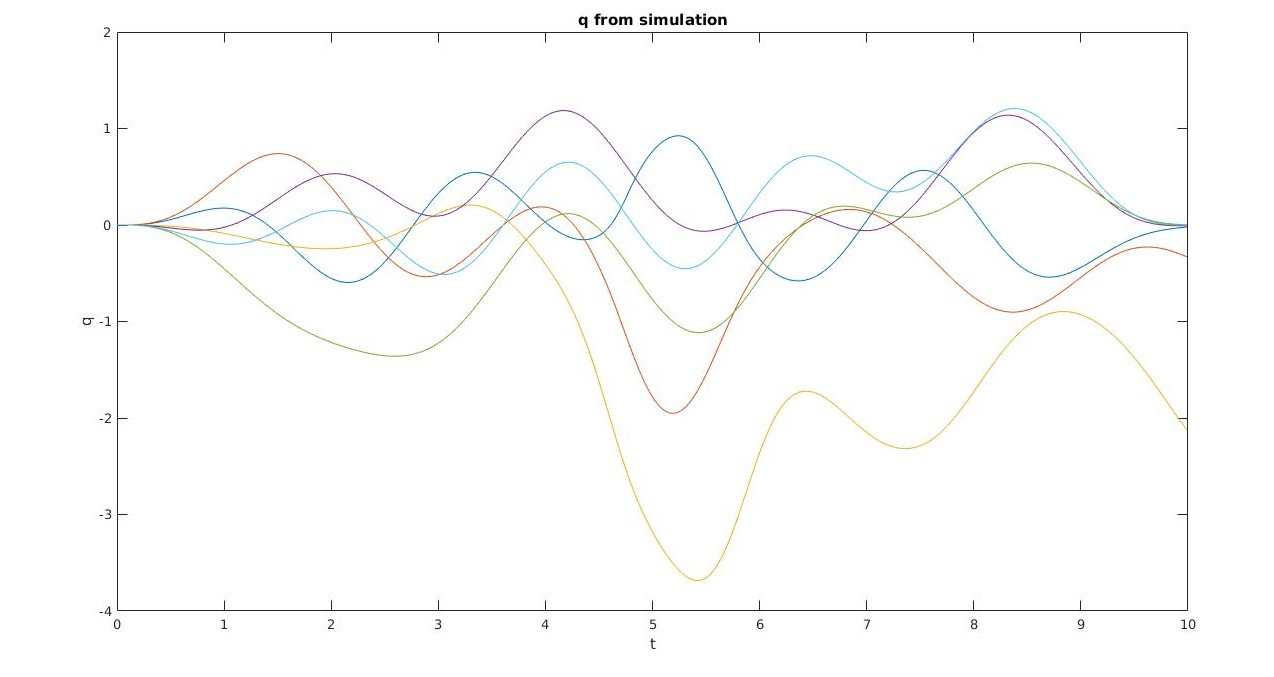

**(b) Use ode45 (or even first-order Euler integration) with the “accel” function that is a function of the robot model “p560” to get $\ddot{q}, \dot{q}, q$.**

In [ ]:
mdl_puma560;
p560 = p560.nofriction;
robot = p560;
load puma560_torque_profile.mat

dt = 0.01;
qdd_o = zeros(length(torque)-1,6);
for i=2:length(torque)-1
    qdd_o(i,:) = qdd_o(i-1,:) + (torque(i-1,:) + torque(i,:))/2 * dt;
end

qd_o = zeros(length(torque)-1,6);
for i=2:length(torque)-1
    qd_o(i,:) = qd_o(i-1,:) + (qdd(i-1,:) + qdd(i,:))/2 * dt;
end

q_o = zeros(length(torque)-1,6);
for i=2:length(torque)-1
    q_o(i,:) = q_o(i-1,:) + (qd(i-1,:) + qd(i,:))/2 * dt;
end

subplot(2,2,1)
plot(t,q_o)
xlabel('t')
ylabel('q')
title('q from integration')
subplot(2,2,2)
plot(t,qd_o)
xlabel('t')
ylabel('qd')
title('qdot from integration')
subplot(2,2,3)
plot(t,qdd_o)
xlabel('t')
ylabel('qdd')
title('qddot from integration')

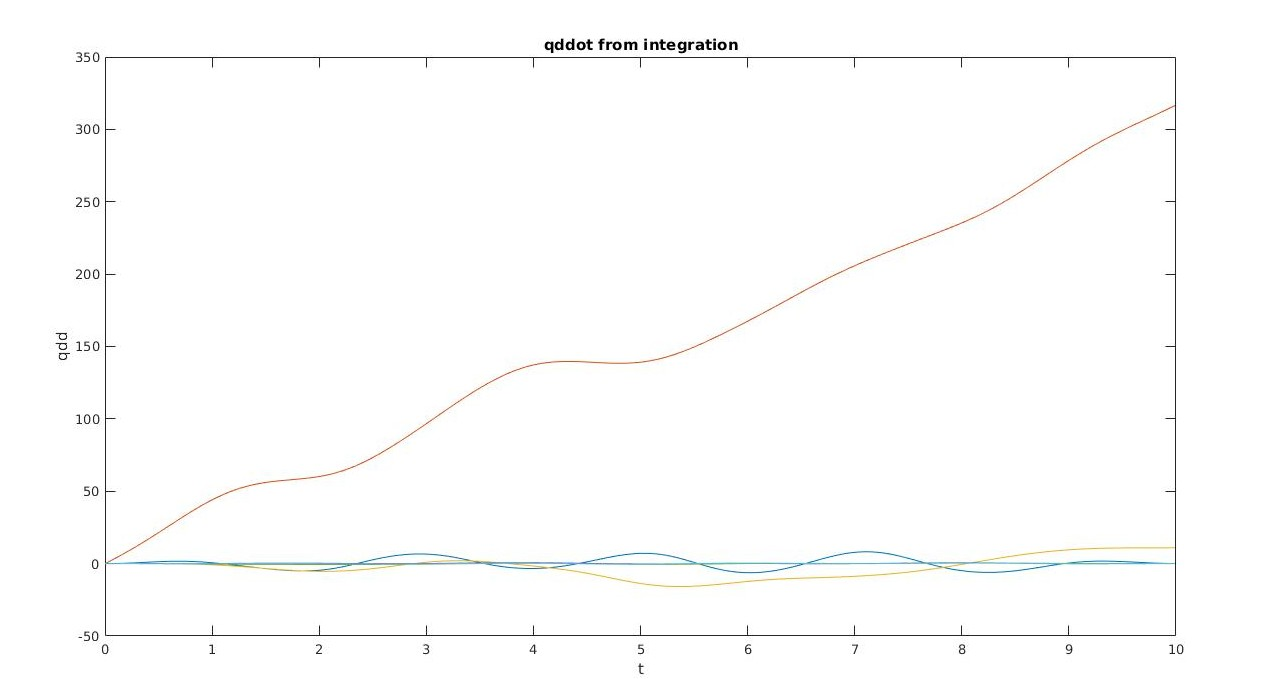
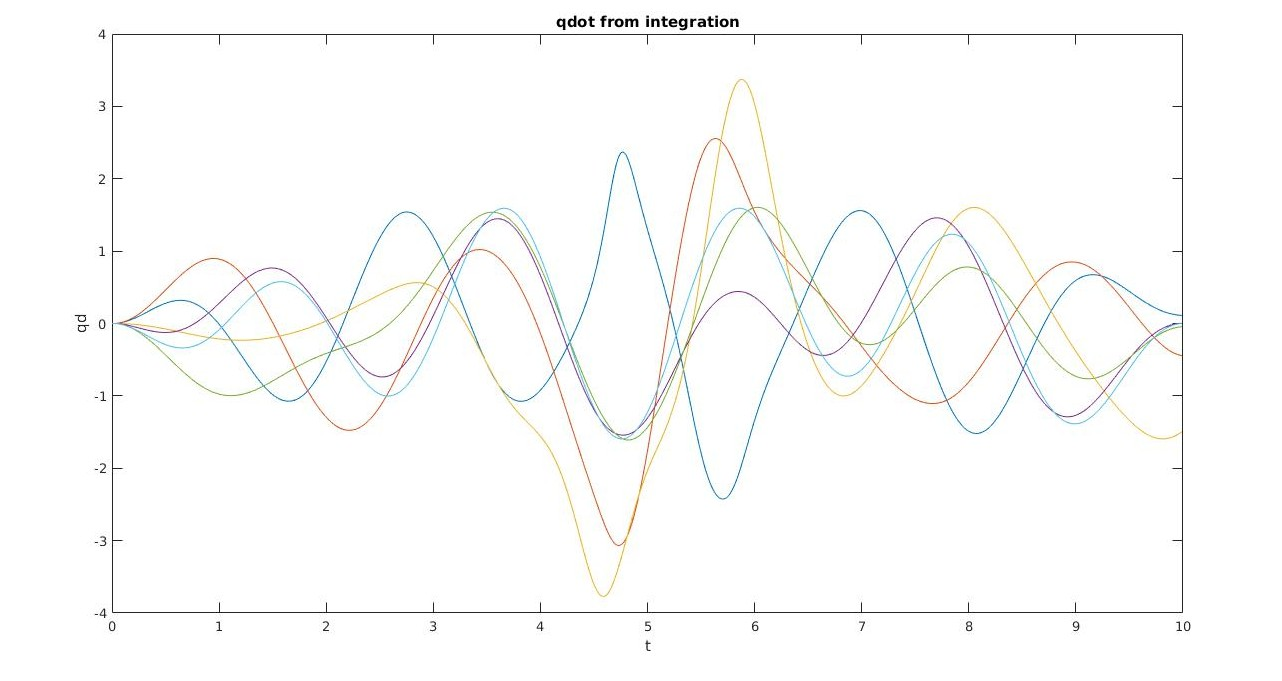
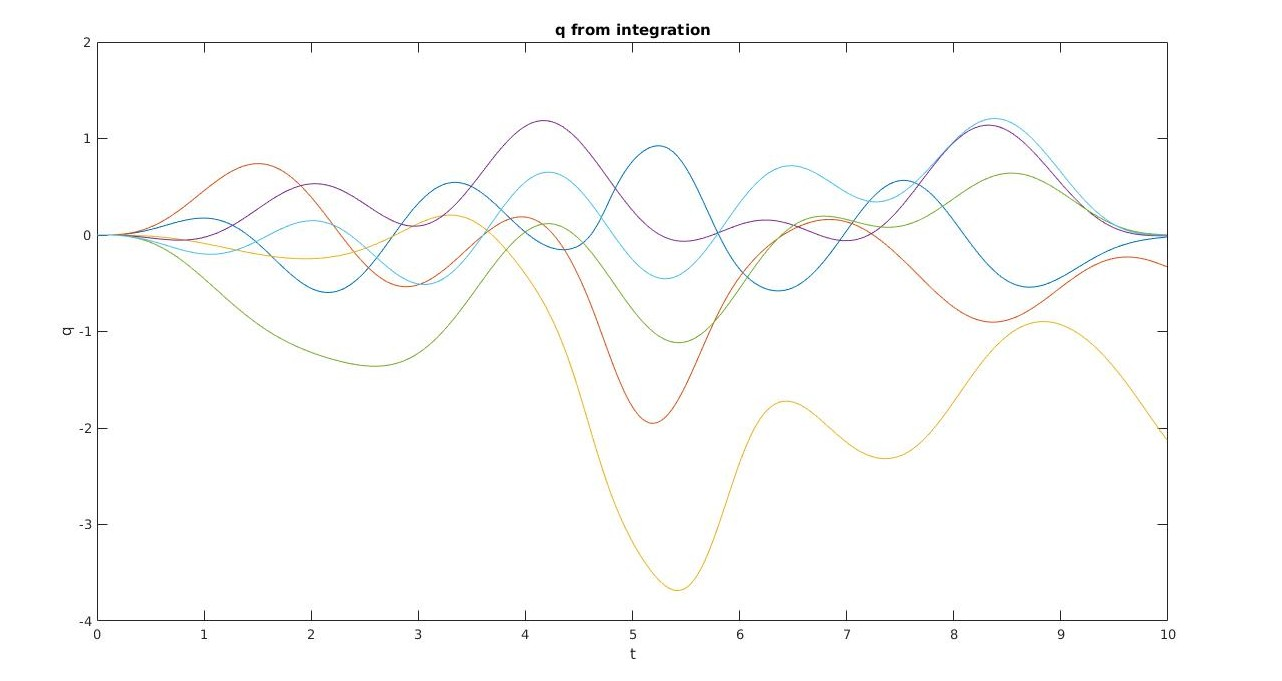

**(c) Check to see if both methods give the same values or not and report your findings. They should at least give very similar results. Turn in plots of results for both methods and code for part b).**

Both methods gave very similar results for the position and the velocity. However, acceleration turned out to be a bit different. It is interesting that the other two plots still turned out similar.